In [3]:
#2022-04-11 머신러닝 9회차
#데이터 불러오기
from sklearn import datasets
digit_dataset=datasets.load_digits()
digit_dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digit_dataset["images"].shape

(1797, 8, 8)

In [5]:
digit_dataset["target"][0]

0

In [6]:
digit_dataset["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

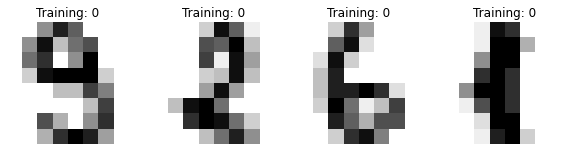

In [18]:
import matplotlib.pyplot as plt
from random import randint
_, axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))

for ax in axes:
    num=randint(1,1000)
    image=digit_dataset["images"][num]
    labe=digit_dataset["target"][num]
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title('Training: %i'%label)

In [19]:
digit_dataset["data"][0].shape

(64,)

In [21]:
#데이터 분류하기
from sklearn.model_selection import train_test_split
X=digit_dataset["data"]
y=digit_dataset["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [36]:
from sklearn.linear_model import LogisticRegression

#max_iter를 지정해주지 않으면 수렴할때까지 코드가 실행되기 때문에 한계치를 지정해준다
logreg_ovr = LogisticRegression(multi_class="ovr",max_iter=1000) 
logreg_softmax = LogisticRegression(multi_class="multinomial",solver="sag",max_iter=1000)

logreg_ovr.fit(X_train, y_train)
logreg_softmax.fit(X_train, y_train)


LogisticRegression(max_iter=1000, multi_class='multinomial', solver='sag')

In [37]:
#성능 측정하기
from sklearn.metrics import confusion_matrix
y_pred=logreg_ovr.predict(X_test).copy()
y_true=y_test.copy()
confusion_matrix(y_true,y_pred)

array([[44,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  2,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 42,  0,  2,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 44,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 47,  0,  1],
       [ 0,  4,  1,  1,  0,  2,  0,  0, 35,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 51]], dtype=int64)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       0.88      0.92      0.90        38
           2       0.93      1.00      0.97        43
           3       0.93      0.93      0.93        45
           4       1.00      0.98      0.99        42
           5       0.92      0.96      0.94        46
           6       1.00      1.00      1.00        49
           7       1.00      0.98      0.99        48
           8       0.97      0.80      0.88        44
           9       0.94      1.00      0.97        51

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [39]:
result=confusion_matrix(y_true,y_pred)
result.diagonal().sum()/result.sum(axis=0).sum()

0.9577777777777777

In [40]:
from sklearn.metrics import precision_score
precision_score(y_true,y_pred,average="micro")

0.9577777777777777

In [41]:
precision_score(y_true,y_pred,average="macro")

0.9576449275362318

In [42]:
precision_score(y_true,y_pred,average=None)

array([1.        , 0.875     , 0.93478261, 0.93333333, 1.        ,
       0.91666667, 1.        , 1.        , 0.97222222, 0.94444444])

In [33]:
#ROC커브와 AUC 사이킷런 코드로 구현
import numpy as np
from sklearn import metrics

y=np.array([1,1,2,2])
scores=np.array([0.1,0.4,0.35,0.8])
fpr,tpr,thresholds=metrics.roc_curve(y,scores,pos_label=2)

# fpr - array([0. , 0. , 0.5, 0.5, 1. ])
# tpr - array([0. , 0.5, 0.5, 1. , 1. ])
# thresholds - array([1.8 , 0.8 , 0.4 , 0.35, 0.1 ])

In [43]:
y=np.array([1,1,2,2])
pred=np.array([0.1,0.4,0.35,0.8])
fpr,tpr,threshholds=metrics.roc_curve(y,pred,pos_label=2)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.75

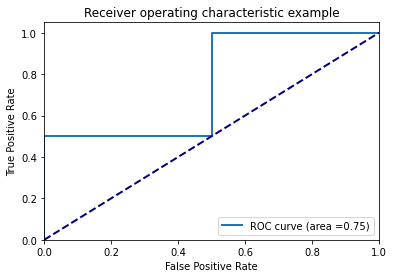

In [44]:
import matplotlib.pyplot as plt

plt.figure()
lw=2
plt.plot(fpr,tpr,lw=lw,label="ROC curve (area =%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()